# Perceptron

Dans ce notebook nous allons implementer l'algorithme du perceptron
avec 2 temps: sans puis avec le learning rate

Nous observerons
- la convergence du perceptron sur les OR et sur le XOR
- la dépendence aux valeurs d'initialisation
- l'impact du learning rate


## L'agorithme du perceptron

Soit X une matrice de N echantillons de taille p et y le vecteur de classification binaire à valeurd dans [0, 1]

L'algorithme va trouver les coefficients w et le biais b tels que

H(w.X^T + b) = y

ou H est la fonction de heavyside :

H(x) = 0 si x < 0 1 sinon



1. initialisation des valeurs
    ```
    w = np.zeros(p)
    b = 0
    ```

2. a chaque iteration :
    - echantillon aleatoire de X et y : xi et yi
    - calcul de y_hat = (w.xi + b)
    - si y_hat != yi : maj des coefficients et du biais
    ```
    w += (yi - y_hat) * xi
    b += (yi - y_hat)
    ```



In [1]:
import numpy as np

In [5]:
# Input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Labels OR
y = np.array([0, 1, 1, 1])
# coeffs et biais
w = np.zeros(X.shape[1])
b = 0
# Number of iterations
n_iters = 20


In [35]:
for n in range(n_iters):
    # Echantillonage
    idx = np.random.randint(0, len(y))
    xi = X[idx]
    target = y[idx]

    # combinaison linéaire des coefficients et du biais
    sample_output = np.dot(xi, w) + b
    # Prediction avec la fonction de Heavyside
    y_pred = 1 if sample_output >= 0 else 0

    # Mise a jour des coefficients et du biais
    update = target - y_pred
    w += update * xi
    b += update

    # test de convergence
    full_output = np.dot(X, np.transpose(w))  + b
    full_output = np.where(full_output < 0, 0, 1)
    loss = np.sum(np.abs(full_output-y))
    if loss == 0:
        print(f"Iteration {n+1}: Target={target}, Input={xi}, Weights={w}, Bias={b}, Loss={loss}")
        print(f"-- convergence ! {n} iterations")
        break;
    else:
        print(f"Iteration {n+1}: Target={target}, Input={xi}, Weights={w}, Bias={b}, Loss={loss}")

print("Final Weights:", w)
print("Final Bias:", b)


Iteration 1: Target=1, Input=[-0.58099832  4.93874171], Weights=[-5.33528779  3.18561299], Bias=1.5, Loss=40
Iteration 2: Target=0, Input=[2.25290596 7.70502627], Weights=[-7.58819375 -4.51941329], Bias=0.5, Loss=11
Iteration 3: Target=1, Input=[-3.10340893  5.63263431], Weights=[-10.69160268   1.11322102], Bias=1.5, Loss=25
Iteration 4: Target=1, Input=[-3.61186349  4.75339328], Weights=[-10.69160268   1.11322102], Bias=1.5, Loss=25
Iteration 5: Target=0, Input=[-0.35907412  4.81421511], Weights=[-10.33252855  -3.70099409], Bias=0.5, Loss=11
Iteration 6: Target=0, Input=[-1.22657869  1.04680477], Weights=[-9.10594986 -4.74779886], Bias=-0.5, Loss=11
Iteration 7: Target=0, Input=[-0.50948418  6.31574377], Weights=[-9.10594986 -4.74779886], Bias=-0.5, Loss=11
Iteration 8: Target=0, Input=[1.02646196 0.39418606], Weights=[-9.10594986 -4.74779886], Bias=-0.5, Loss=11
Iteration 9: Target=0, Input=[-0.34066599  4.88640916], Weights=[-9.10594986 -4.74779886], Bias=-0.5, Loss=11
Iteration 10:

# A vous

- executez le code plusieurs fois et observez le nombre d'itérations nécessaires pour converger
- modifiez les valeurs d'initialisations de w et b



## XOR
Le perceptron apprend OR mais peut il apprendre XOR (non linéairement séparable )

In [7]:
# XOR
y = np.array([0, 1, 1, 0])


# A vous

Faites tourner le perceptron sur XOR, y a t il convergence ?

# Learning rate

Le learning rate est un parammtres important en machine learning qui règle la quantité de modification des coefficients à chaque itération.

pour ajouter le learning rate _alpha_ , il suffit de modifier la ligne

```
    update = target - y_pred
```
en
```
    update = alpha * (target - y_pred)
```
où _alpha_  <= 1

Le code devient

In [ ]:
# Input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Labels OR
y = np.array([0, 1, 1, 1])
# coeffs et biais
w = np.zeros(X.shape[1])
b = 0
# Number of iterations
n_iters = 20

# learning rate
alpha = 0.5


In [36]:
for n in range(n_iters):
    # Echantillonage
    idx = np.random.randint(0, len(y))
    xi = X[idx]
    target = y[idx]

    # combinaison linéaire des coefficients et du biais
    sample_output = np.dot(xi, w) + b
    # Prediction avec la fonction de Heavyside
    y_pred = 1 if sample_output >= 0 else 0

    # Mise a jour des coefficients et du biais
    update = alpha * (target - y_pred)
    w += update * xi
    b += update

    # test de convergence
    full_output = np.dot(X, np.transpose(w))  + b
    full_output = np.where(full_output < 0, 0, 1)
    loss = np.sum(np.abs(full_output-y))
    if loss == 0:
        print(f"Iteration {n+1}: Target={target}, Input={xi}, Weights={w}, Bias={b}, Loss={loss}")
        print(f"-- convergence ! {n} iterations")
        break;
    else:
        print(f"Iteration {n+1}: Target={target}, Input={xi}, Weights={w}, Bias={b}, Loss={loss}")

print("Final Weights:", w)
print("Final Bias:", b)


Iteration 1: Target=1, Input=[-2.57496023  5.76478205], Weights=[-10.39342997  -1.86540784], Bias=0.0, Loss=14
Iteration 2: Target=1, Input=[-3.09986997  3.69237421], Weights=[-10.39342997  -1.86540784], Bias=0.0, Loss=14
Iteration 3: Target=1, Input=[-6.66979708  3.40578039], Weights=[-10.39342997  -1.86540784], Bias=0.0, Loss=14
Iteration 4: Target=1, Input=[-6.92906745  1.99022423], Weights=[-10.39342997  -1.86540784], Bias=0.0, Loss=14
Iteration 5: Target=0, Input=[-1.22657869  1.04680477], Weights=[-9.78014063 -2.38881022], Bias=-0.5, Loss=12
Iteration 6: Target=1, Input=[-6.04876215  5.03489732], Weights=[-9.78014063 -2.38881022], Bias=-0.5, Loss=12
Iteration 7: Target=0, Input=[2.37305899 2.33491067], Weights=[-9.78014063 -2.38881022], Bias=-0.5, Loss=12
Iteration 8: Target=1, Input=[-6.92906745  1.99022423], Weights=[-9.78014063 -2.38881022], Bias=-0.5, Loss=12
Iteration 9: Target=1, Input=[-0.58099832  4.93874171], Weights=[-10.07063979   0.08056063], Bias=0.0, Loss=20
Iterati

# A vous

Pour alpha = 1 on retrouve la premiere version du perceptron

faites tourner le code pour des valeurs de alpha variant de tres petit (0.01 ou moins) à proche de 1

Quel est l'impact du learning rate ?

# Blobs

Prenons maintenant un dataset plus complexe avec la fonction `make_blob` de scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

(30, 2)
[0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1]


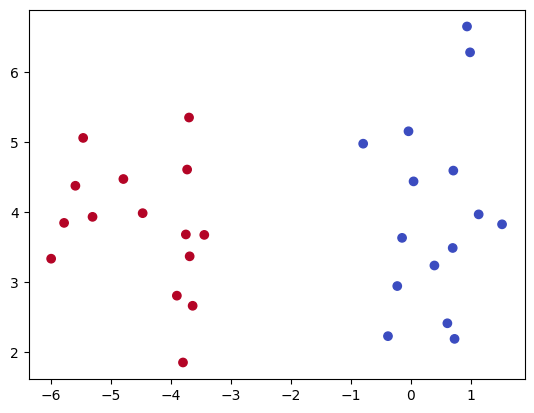

In [26]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=30, centers=2, n_features=2, random_state=80, cluster_std = 1.0)
print(X.shape)
print(y)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', label=['Class 0', 'Class 1'])



Faites tourner le perceptron sur ce dataset

Iteration 1: Target=1, Input=[-3.85626805  3.86668954], Weights=[0. 0.], Bias=0.0, Loss=50
Iteration 2: Target=1, Input=[-5.40151821  5.82920795], Weights=[0. 0.], Bias=0.0, Loss=50
Iteration 3: Target=0, Input=[1.15389325 3.20335572], Weights=[-0.11538932 -0.32033557], Bias=-0.1, Loss=49
Iteration 4: Target=1, Input=[-3.73818859  3.19147973], Weights=[-0.48920818 -0.0011876 ], Bias=0.0, Loss=17
Iteration 5: Target=0, Input=[-0.03558493  5.15193556], Weights=[-0.48564969 -0.51638115], Bias=-0.1, Loss=19
Iteration 6: Target=1, Input=[-5.02236311  3.73510417], Weights=[-0.48564969 -0.51638115], Bias=-0.1, Loss=19
Iteration 7: Target=1, Input=[-3.85301475  4.5611359 ], Weights=[-0.87095117 -0.06026756], Bias=0.0, Loss=11
Iteration 8: Target=0, Input=[1.14274256 3.30578805], Weights=[-0.87095117 -0.06026756], Bias=0.0, Loss=11
Iteration 9: Target=1, Input=[-3.58879041  4.62720977], Weights=[-0.87095117 -0.06026756], Bias=0.0, Loss=11
Iteration 10: Target=1, Input=[-3.95390441  3.44885438],

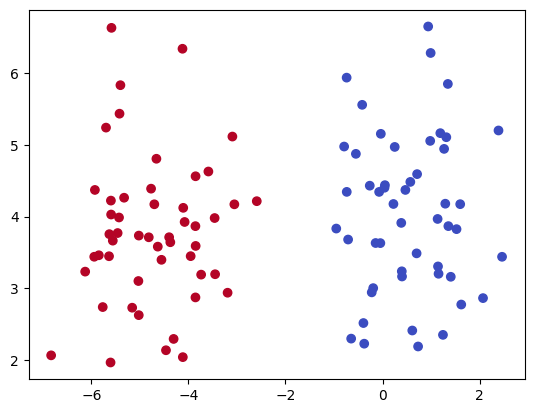

In [38]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=80, cluster_std = 1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

w = np.zeros(X.shape[1])
b = 0
# Number of iterations
n_iters = 20

# learning rate
alpha = 0.1

for n in range(n_iters):
    # Echantillonage
    idx = np.random.randint(0, len(y))
    xi = X[idx]
    target = y[idx]

    # combinaison linéaire des coefficients et du biais
    sample_output = np.dot(xi, w) + b
    # Prediction avec la fonction de Heavyside
    y_pred = 1 if sample_output >= 0 else 0

    # Mise a jour des coefficients et du biais
    update = alpha * (target - y_pred)
    w += update * xi
    b += update

    # test de convergence
    full_output = np.dot(X, np.transpose(w))  + b
    full_output = np.where(full_output < 0, 0, 1)
    loss = np.sum(np.abs(full_output-y))
    if loss == 0:
        print(f"Iteration {n+1}: Target={target}, Input={xi}, Weights={w}, Bias={b}, Loss={loss}")
        print(f"-- convergence ! {n} iterations")
        break;
    else:
        print(f"Iteration {n+1}: Target={target}, Input={xi}, Weights={w}, Bias={b}, Loss={loss}")

print("Final Weights:", w)
print("Final Bias:", b)

# A vous
Que se passe t il quand on augmente la variance de X ?

cluster_std = 2.0